In [69]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mplot
import plotly.graph_objs as mplot3D
import plotly.express as px3D

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import warnings
warnings.filterwarnings("ignore")

conjuntoDatos = pd.read_csv('./mallcustomers.csv')
conjuntoDatos.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


2. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [40]:
conjuntoDatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [41]:
conjuntoDatos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificacion de datos atipicos')

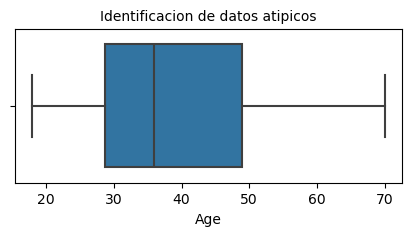

In [42]:
mplot.figure(figsize = (5,2))
sns.boxplot(x = conjuntoDatos["Age"])
mplot.title("Identificacion de datos atipicos", fontsize = 10)

Text(0.5, 1.0, 'Identificacion de datos atipicos')

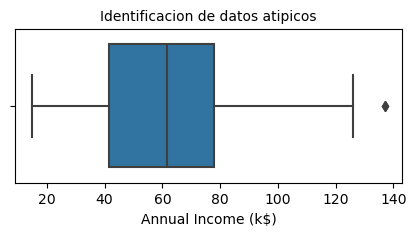

In [43]:
mplot.figure(figsize = (5,2))
sns.boxplot(x = conjuntoDatos["Annual Income (k$)"])
mplot.title("Identificacion de datos atipicos", fontsize = 10)

Text(0.5, 1.0, 'Identificacion de datos atipicos')

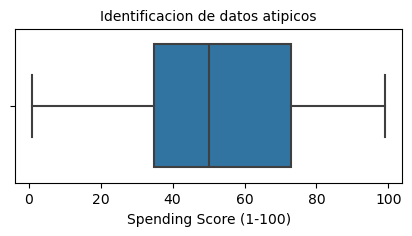

In [44]:
mplot.figure(figsize = (5,2))
sns.boxplot(x = conjuntoDatos["Spending Score (1-100)"])
mplot.title("Identificacion de datos atipicos", fontsize = 10)


3. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [68]:
conjuntoDatos.loc[conjuntoDatos['Gender'] == 'Male', 'Genero'] = 0
conjuntoDatos.loc[conjuntoDatos['Gender'] == 'Female', 'Genero'] = 1
#conjuntoDatos.loc[:,'Ingreso_anual'] *= 1000
conjuntoDatos

KeyError: 'Gender'

4. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
    
    variables objetivos del agrupamiento.

    * Salario_anual.
    * Puntaje_credito.
    * Edad.
    

In [48]:
subconjuntoDatos = conjuntoDatos[["Annual Income (k$)", "Spending Score (1-100)", "Age"]]
subconjuntoDatos.head(10)

,Annual Income (k$),Spending Score (1-100),Age
0,-1.738999,-0.434801,-1.424569
1,-1.738999,1.195704,-1.281035
2,-1.700830,-1.715913,-1.352802
3,-1.700830,1.040418,-1.137502
4,-1.662660,-0.395980,-0.563369
5,-1.662660,1.001596,-1.209269
6,-1.624491,-1.715913,-0.276302
7,-1.624491,1.700384,-1.137502
8,-1.586321,-1.832378,1.804932
9,-1.586321,0.846310,-0.635135


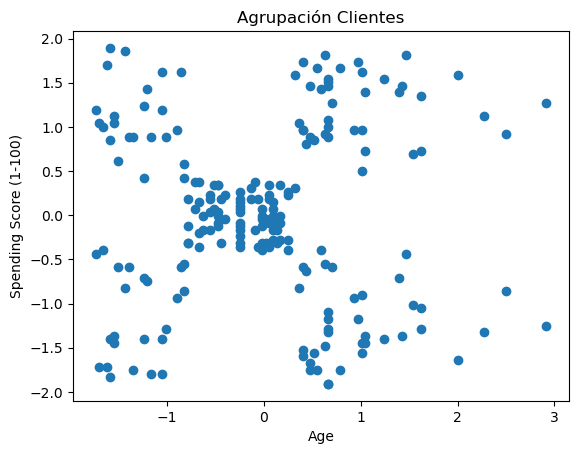

In [49]:
mplot.scatter(subconjuntoDatos['Annual Income (k$)'], subconjuntoDatos['Spending Score (1-100)'])
mplot.xlabel('Age')
mplot.ylabel('Spending Score (1-100)')
mplot.title('Agrupación Clientes')
mplot.show()

5. Entrenar el modelo configurando los diferentes hiperparámetros.

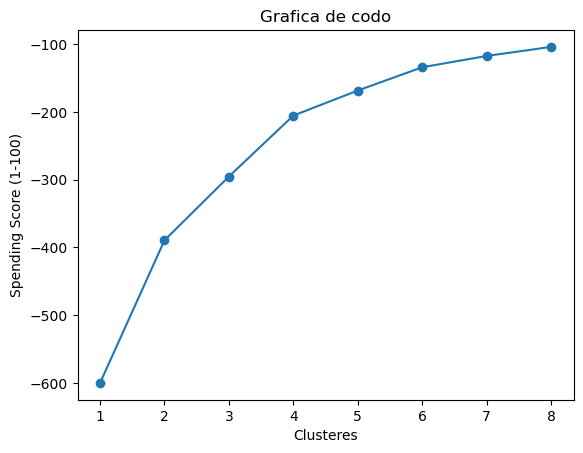

In [50]:
RangoGrafica = range(1,9)
kmeans = [KMeans(n_clusters = iterador) for iterador in RangoGrafica]
kmeans
score = [kmeans[iterador].fit(subconjuntoDatos).score(subconjuntoDatos) for iterador in range(len(kmeans))]
score
mplot.plot(RangoGrafica, score, marker = "o")
mplot.xlabel('Clusteres')
mplot.ylabel('Spending Score (1-100)')
mplot.title('Grafica de codo')
mplot.show()

In [51]:
ModeloKmeans = KMeans(n_clusters = 6, random_state = 0)
ModeloKmeans.fit(subconjuntoDatos)


KMeans(n_clusters=6, random_state=0)

In [52]:

ModeloKmeans.labels_
subconjuntoDatos['Clusteres'] = ModeloKmeans.labels_
print(subconjuntoDatos)


     Annual Income (k$)  Spending Score (1-100)       Age  Clusteres
0             -1.738999               -0.434801 -1.424569          5
1             -1.738999                1.195704 -1.281035          5
2             -1.700830               -1.715913 -1.352802          4
3             -1.700830                1.040418 -1.137502          5
4             -1.662660               -0.395980 -0.563369          4
..                  ...                     ...       ...        ...
195            2.268791                1.118061 -0.276302          2
196            2.497807               -0.861839  0.441365          3
197            2.497807                0.923953 -0.491602          2
198            2.917671               -1.250054 -0.491602          3
199            2.917671                1.273347 -0.635135          2

[200 rows x 4 columns]


6. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

In [53]:
num_Observaciones = len(subconjuntoDatos)
X = subconjuntoDatos.drop('Clusteres', axis = 1)
clusters = subconjuntoDatos['Clusteres']


puntaje_Silueta = silhouette_score(X, clusters)
puntaje_Calinski = calinski_harabasz_score(X, clusters)
puntaje_Davies = davies_bouldin_score(X, clusters)


tabla_subConjunto = [['Numero observaciones', num_Observaciones],
                     ['Puntaje Silueta', puntaje_Silueta],
                     ['Indice Calinski-harabasz', puntaje_Calinski],
                     ['Indice Davies Boulin', puntaje_Davies]]

from tabulate import tabulate
print (tabulate(tabla_subConjunto, 
                headers = ['Metricas', 'valores'], 
                tablefmt = 'pretty'))
                     

+--------------------------+--------------------+
|         Metricas         |      valores       |
+--------------------------+--------------------+
|   Numero observaciones   |        200         |
|     Puntaje Silueta      | 0.4268547747113388 |
| Indice Calinski-harabasz | 135.0755429279395  |
|   Indice Davies Boulin   | 0.8238802468310343 |
+--------------------------+--------------------+


7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo


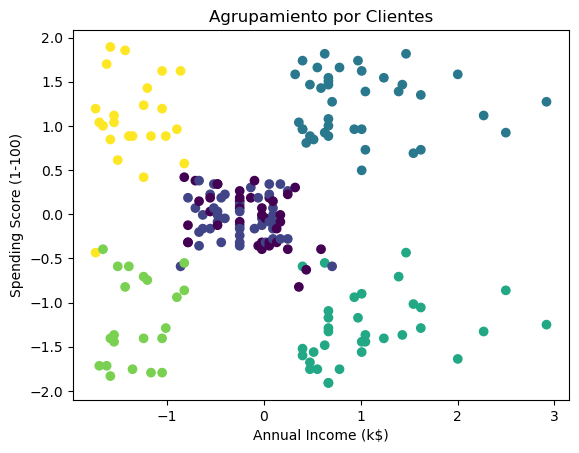

In [54]:
mplot.scatter(subconjuntoDatos['Annual Income (k$)'], subconjuntoDatos['Spending Score (1-100)'], 
                                c = subconjuntoDatos['Clusteres'], cmap = 'viridis')
mplot.xlabel('Annual Income (k$)')
mplot.ylabel('Spending Score (1-100)')
mplot.title('Agrupamiento por Clientes')
mplot.show()

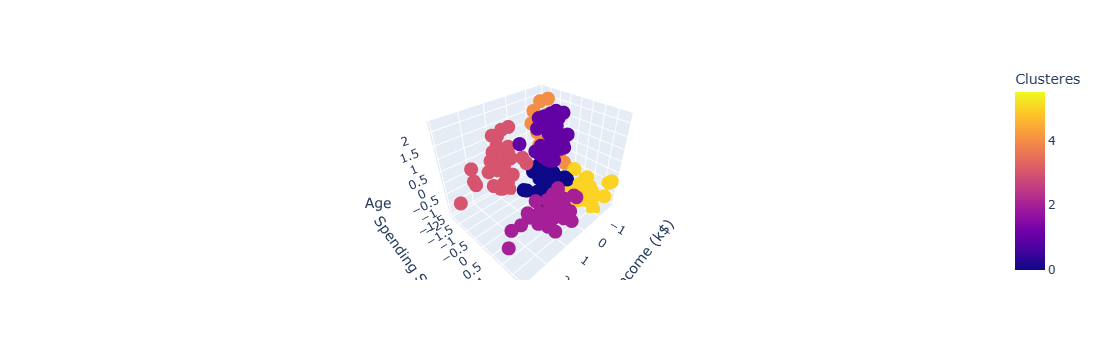

In [55]:
grafica3D = px3D.scatter_3d(subconjuntoDatos, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', 
                                              z = 'Age', color = 'Clusteres', symbol = 'Clusteres',
                                              symbol_map = {0: 'circle', 1: 'circle', 
                                                          2: 'circle', 3: 'circle', 4:'circle'})
grafica3D.update_layout(showlegend = False)

8. Interpretar, analizar y documentar los resultados obtenidos.

# Hierarchical clustering

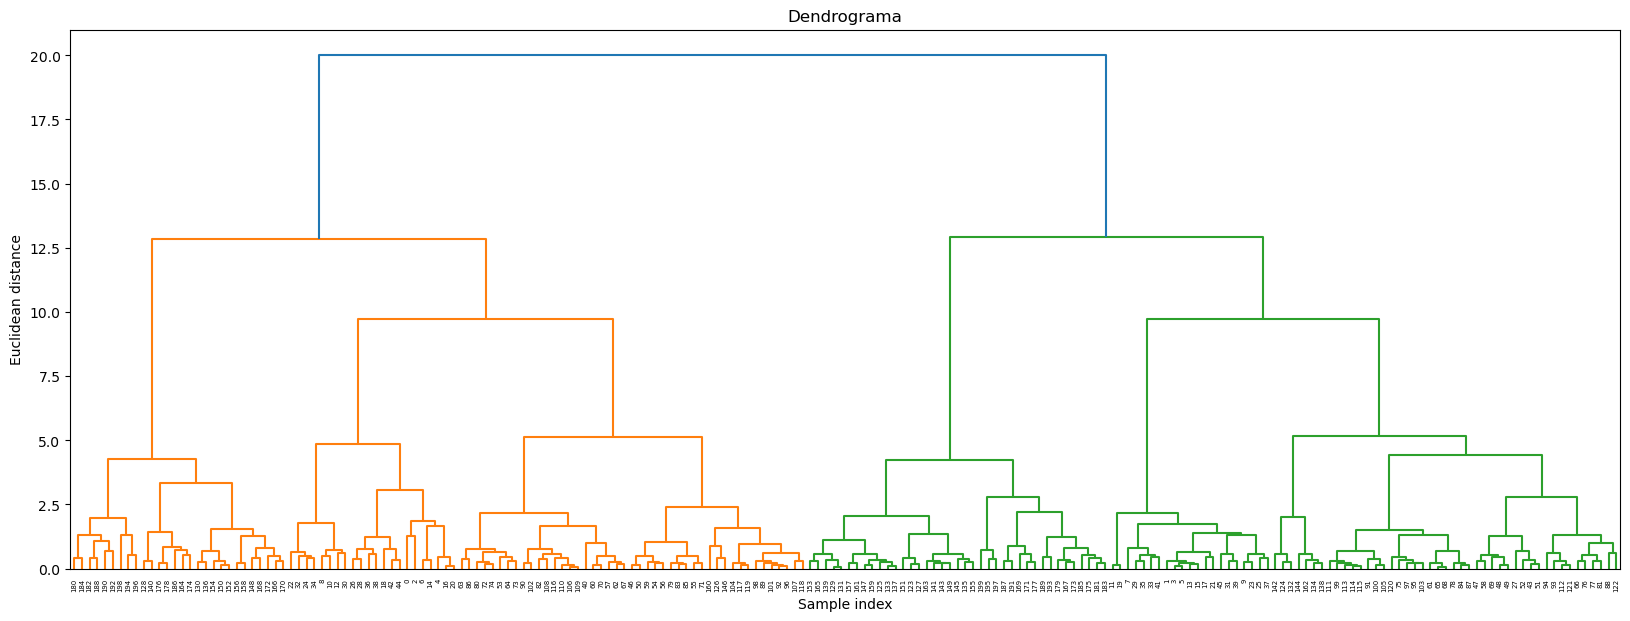

In [56]:
ward_clustering= linkage (X, method="ward", metric="euclidean")
mplot.figure(figsize=(20,7))
dendrogram(ward_clustering)
mplot.axhline(y=200, color='r', linestyle='-')
mplot.title('Dendrograma')
mplot.xlabel('Sample index')
mplot.ylabel('Euclidean distance')
mplot.show()

In [70]:

hier_clustering=AgglomerativeClustering(n_clusters=3)
labels_hier=hier_clustering.fit_predict(X)
labels_hier

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)